# Image Classification - Pre-Trained Model
By Sovanna Ramirez

## Introduction

In this assignment I will gain experience with Python using Keras. In this dataset **Chessman Image Dataset** found here: https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset we aim to have our model identify images and classify them as a bishop, king, knight, pawn, queen, or rook. Using this data set, I will try to train my models to identify whether an image is a bishop, king, knight, pawn, queen, or rook.

In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow.io
import tensorflow.keras
import tensorflow.image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Train/Test Split
From our dataset we can see that we are working with **six** classes. We see that after performing the train/test split on our dataset that out of the 552 files, 80% of those, or 442 files, are dedicated to training and 20%, or 110 files are dedicated for validation purposes. The classes of this dataset include: bishop, king, knight, pawn, queen, and rook.

In [10]:
batch_size = 128
img_shape = (160,160)
epochs = 20

path = "/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess"

train_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

class_names = train_dataset.class_names
print("\nClass Names:", class_names)

Found 552 files belonging to 6 classes.
Using 442 files for training.
Found 552 files belonging to 6 classes.
Using 110 files for validation.

Class Names: ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']


In [11]:
validation_batch = tf.data.experimental.cardinality(validation_data)
test_dataset = validation_data.take(validation_batch // 3)
validation_data = validation_data.skip(validation_batch // 3)

print('Validation Batches: %d' % tf.data.experimental.cardinality(validation_data))
print('Test Batches: %d' % tf.data.experimental.cardinality(test_dataset))

Validation Batches: 1
Test Batches: 0


## Graphing Distribution of Target Classes
Upon graphing our distribution of target classes we can see the number of images per chess piece, with pawn having the most images.

[87, 76, 106, 107, 78, 102]


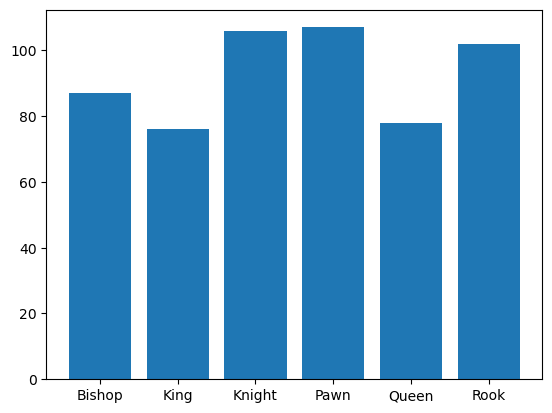

In [12]:
import fnmatch

class_distribution = []

for classification in class_names:
    dir_path = os.path.join(path, classification)
    count = len(fnmatch.filter(os.listdir(dir_path),'*.*'))
    class_distribution.append(count)
    
print(class_distribution)

x = np.array(class_names)
y = np.array(class_distribution)

plt.bar(x,y)
plt.show()

## Data Augmentation

In [13]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

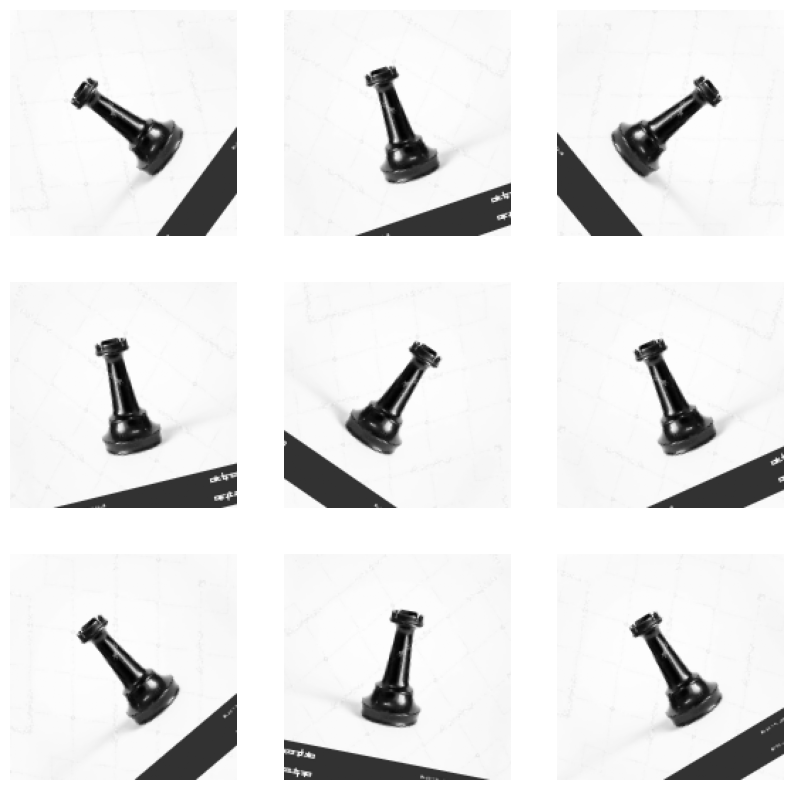

In [14]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

### Rescale Pixel Values

In [15]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

### Create a Base Model

In [19]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = img_shape + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights="imagenet")

ValueError: `input_shape` must be a tuple of three integers.

In [17]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

NameError: name 'base_model' is not defined

In [23]:
base_model.trainable = False
base_model.summary()

NameError: name 'base_model' is not defined

## Building the Pre-Trained Model

In [22]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

NameError: name 'base_model' is not defined